In [29]:
import array
import numpy as np
import soundfile as sf
from pydub import AudioSegment
import os

#df = pd.read_csv('cv-corpus-9.0-2022-04-27/ar/dev.tsv', sep='\t')

sound_path = 'cv-corpus-9.0-2022-04-27/ar/clips'
background_sound_path = 'background_sound/water-fountain-sound-effect.mp3'
background_sound = AudioSegment.from_mp3(background_sound_path) - 5
path = os.path.join('mixed_sound',background_sound_path.split('/')[-1].split('.')[0])


SNR_group = [0, 5, 10, 15]


for filename in os.listdir(sound_path):
    sound = AudioSegment.from_mp3(os.path.join(sound_path,filename))
    S_dBFS = sound.dBFS
    N_dBFS = background_sound.dBFS
    diff = np.abs(S_dBFS - N_dBFS)
    if S_dBFS > N_dBFS:
        background_sound += diff
    else:
        sound += diff
        
    for i in SNR_group:
        saved_path = os.path.join(path,'SNR_'+str(i)+'dB')
        if not os.path.exists(saved_path):
            os.makedirs(saved_path)

        sound += i
        #print(sound.dBFS, background_sound.dBFS)
        mixed_sound = sound.overlay(background_sound, position = 0) 
        mixed_sound = mixed_sound 
        
        target_path = os.path.join(saved_path,filename)
            
        mixed_sound.export(target_path, format="mp3")



#print(mixed_sound.frame_rate)



KeyboardInterrupt: 

No handles with labels found to put in legend.


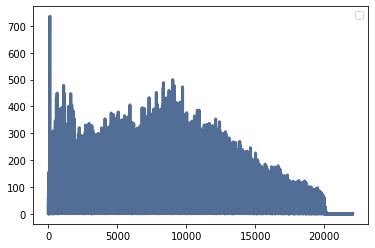

No handles with labels found to put in legend.


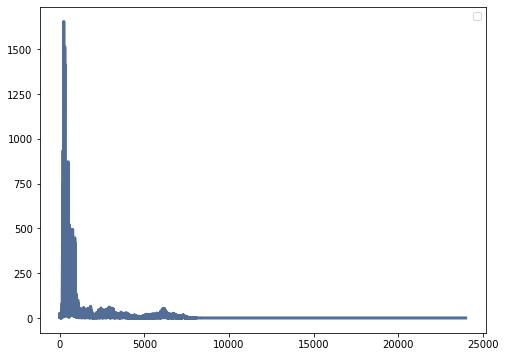

No handles with labels found to put in legend.


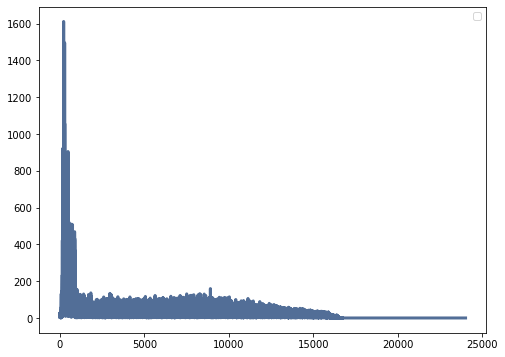

<Figure size 576x432 with 0 Axes>

In [1]:
from matplotlib import pyplot
import thinkdsp
import thinkplot
from pydub import AudioSegment
from pydub.utils import get_array_type

def trans_mp3_2_wav(filepath):
    sound = AudioSegment.from_mp3(filepath)
    sound.export("now.wav", format="wav")


#trans_mp3_2_wav('water-fountain-sound-effect.mp3')

wave_b=thinkdsp.read_wave("waterfall.wav")
spectrum_b=wave_b.make_spectrum()
spectrum_b.plot()
thinkplot.show()

wave1=thinkdsp.read_wave("1.wav")
spectrum1=wave1.make_spectrum()
spectrum1.plot()
thinkplot.show()

wave2=thinkdsp.read_wave("2.wav")
spectrum2=wave2.make_spectrum()
spectrum2.plot()
thinkplot.show()